In [66]:
# import required library
import torch
import numpy as np
import torchvision
from torch import nn
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

### I got the SSL_Certificate_Verified_error
### So I manually download the data and unzip and put it on the required directory

In [10]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# Download Training data from open datasets
data = torchvision.datasets.EuroSAT(
    root="data",   # where to download data to?
    download=True, # download if doesnot exist on disk
    transform=ToTensor(),  # image come as PIL format, convert this into tensor
    target_transform=None  # for transform label as well
)

In [14]:
data

Dataset EuroSAT
    Number of datapoints: 27000
    Root location: data
    StandardTransform
Transform: ToTensor()

In [35]:
# Splitting the data for training and testing
#import sklearn
#from sklearn.model_selection import train_test_split
#training_data, testing_data = train_test_split(data, test_size=0.2, random_state=42)

# It takes too much time to split so better to use
# torch.utils.data.random_split
# train_test_split from scikit learn is not optimized for handling tensor so it returns the list
# as the training and testing sets
torch.manual_seed(42)
from torch.utils.data import random_split
train_size = int(0.8 * len(data))
test_size = len(data) - train_size
print(train_size, test_size)
training_data, testing_data = random_split(data, [train_size, test_size])

21600 5400


In [36]:
# How many sample are there
len(training_data), len(training_data)

(21600, 21600)

In [43]:
if isinstance(training_data[0][0], torch.Tensor):  # training data is a subset
    print("Tensor")

Tensor


In [57]:
# see classes name
# While creating a subset using random_split mwthod, the subset object doesnot have a classes attribute.
# The classes attribute is available on the original datset so used data.classes
class_names = data.classes
class_names

['AnnualCrop',
 'Forest',
 'HerbaceousVegetation',
 'Highway',
 'Industrial',
 'Pasture',
 'PermanentCrop',
 'Residential',
 'River',
 'SeaLake']

In [73]:
# Visualize the data
image_tensor, label = training_data[1]
image_tensor, label

(tensor([[[0.2314, 0.2275, 0.2235,  ..., 0.7451, 0.7137, 0.6784],
          [0.2314, 0.2314, 0.2196,  ..., 0.7412, 0.7020, 0.6706],
          [0.2078, 0.2078, 0.2118,  ..., 0.5882, 0.5529, 0.5216],
          ...,
          [0.3765, 0.3647, 0.2824,  ..., 0.8431, 0.8588, 0.8431],
          [0.5059, 0.4902, 0.3804,  ..., 0.8000, 0.8431, 0.8078],
          [0.5529, 0.5373, 0.4706,  ..., 0.7961, 0.8078, 0.8118]],
 
         [[0.3255, 0.3216, 0.3098,  ..., 0.6118, 0.5804, 0.5490],
          [0.3255, 0.3255, 0.3059,  ..., 0.6118, 0.5804, 0.5490],
          [0.3020, 0.3020, 0.2980,  ..., 0.4784, 0.4392, 0.4196],
          ...,
          [0.3922, 0.3961, 0.3373,  ..., 0.6510, 0.6549, 0.6392],
          [0.4510, 0.4549, 0.3843,  ..., 0.6118, 0.6510, 0.6157],
          [0.4706, 0.4745, 0.4471,  ..., 0.6078, 0.6157, 0.6196]],
 
         [[0.3647, 0.3608, 0.3529,  ..., 0.5647, 0.5451, 0.5216],
          [0.3647, 0.3647, 0.3490,  ..., 0.5765, 0.5608, 0.5373],
          [0.3490, 0.3490, 0.3490,  ...,

In [74]:
image_tensor.shape  # color_channel, height, width

torch.Size([3, 64, 64])

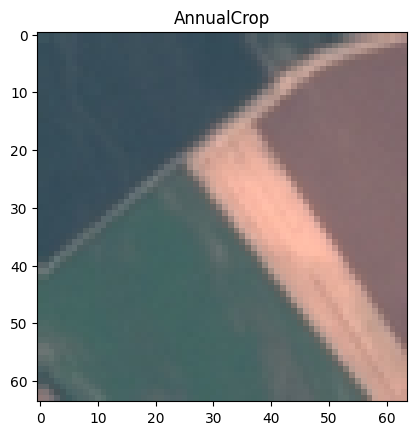

In [75]:
# converting the image into numpy from tensor
image_np = image_tensor.numpy()  # shape will be (C, H, W)

# Rearrange the dimension
image_np = np.transpose(image_np, (1,2,0))  # shape will be (H, W, C)

# plot the image
plt.imshow(image_np)
plt.title(class_names[label])
plt.show()